# Risk Analysis of Covid19 Virus

As the outbreak of coronavirus disease 2019 (COVID-19) progresses, epidemiological data are needed to guide situational awareness and intervention strategies. The enormous impact of the COVID-19 pandemic is obvious. What many still haven’t realized, however, is that the impact on ongoing data science production setups has been dramatic, too. Artificial Intelligence is actively used in identifying high risk patients at an earlier stage and therefore helps to control the spread of the infection in real-time. This becomes particularly important at this time of crisis because real time monitoring is the best option for people to self-isolate and mitigate the spread of the virus.

# Objective 1

1. Given a person and his/her vital data, predict the viability of a RT-PCR test. Basically predict the probability of risk for the given person. The following data inputs could be provided (you can add 3 more attributes)

       a. Name, Age, Gender, Address, Blood Pressure, Cough, Fever, travel history 
       b. Make sure that an optimum position is obtained for the precision and recall metrics. 
       c. Give a brief summary of attributes used, domain knowledge employed, and different data sources utilised and entire EDA process. Complete data analysis should be presented. 
       d. Make an API feature that takes the input of patients as request, and returns the response (probability of infection/ vulnerability).

In [68]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as  plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler,RobustScaler,PowerTransformer,MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

# Loading of Data

In [69]:
pd.set_option('display.max_columns',None)
df=pd.read_csv(r'D:\Velocity Corporate Training\Python\Databases\Healthcare Project\Covid19Precondition\covid.csv')
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,2,2,2,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,2,2,2,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,2,2,2,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2,1,30,97,2,2,2,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,1,2,2,2,1,2,1,2,2,2,99,1,2


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566602 entries, 0 to 566601
Data columns (total 23 columns):
id                     566602 non-null object
sex                    566602 non-null int64
patient_type           566602 non-null int64
entry_date             566602 non-null object
date_symptoms          566602 non-null object
date_died              566602 non-null object
intubed                566602 non-null int64
pneumonia              566602 non-null int64
age                    566602 non-null int64
pregnancy              566602 non-null int64
diabetes               566602 non-null int64
copd                   566602 non-null int64
asthma                 566602 non-null int64
inmsupr                566602 non-null int64
hypertension           566602 non-null int64
other_disease          566602 non-null int64
cardiovascular         566602 non-null int64
obesity                566602 non-null int64
renal_chronic          566602 non-null int64
tobacco                566602 

In [71]:
df.describe()

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
count,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000
mean,1.506726,1.215165,76.562952,1.846262,42.622483,50.400692,2.210633,2.280221,2.265029,2.319628,2.145774,2.410030,2.286157,2.138905,2.283765,2.238360,31.573034,1.728651,76.562864
std,0.499955,0.410937,39.058676,0.560939,16.659973,47.501579,5.683523,5.327832,5.334658,5.667381,5.459866,6.489959,5.438405,5.395578,5.393232,5.571901,45.082123,0.658710,39.059060
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,97.000000,2.000000,31.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,97.000000
50%,2.000000,1.000000,97.000000,2.000000,41.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,97.000000
75%,2.000000,1.000000,97.000000,2.000000,53.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,99.000000,2.000000,97.000000
max,2.000000,2.000000,99.000000,99.000000,120.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,99.000000,3.000000,99.000000


In [72]:
df.columns

Index(['id', 'sex', 'patient_type', 'entry_date', 'date_symptoms', 'date_died',
       'intubed', 'pneumonia', 'age', 'pregnancy', 'diabetes', 'copd',
       'asthma', 'inmsupr', 'hypertension', 'other_disease', 'cardiovascular',
       'obesity', 'renal_chronic', 'tobacco', 'contact_other_covid',
       'covid_res', 'icu'],
      dtype='object')

# Data Description

    (a) Sex
        1: Female

        2: Male

    (b) Patient_type
        1: Outpatient

        2: Inpatient

    (c) Columns with details like pregnancy, diabetes,copd,asthma , etc.
        1: Yes

        2: No

    Others (97,98,99) : Not available

# Feature Conversion into Proper Caategories

In [73]:
df['sex']=df['sex'].replace({1:'Female',2:'Male'})
df['patient_type']=df['patient_type'].replace({1:'Outpatient',2:'Inpatient'})
df['covid_res']=df['covid_res'].replace({1:'Positive',2:'Negative',3:'Results Awaited'})
df['date_died']=df['date_died'].replace({'9999-99-99':'NA'})
df.iloc[:,6:]=df.iloc[:,6:].replace([97,98,99],np.nan)
df.iloc[:,6:]=df.iloc[:,6:].replace(1,'Yes')
df.iloc[:,6:]=df.iloc[:,6:].replace(2,'No')

In [74]:
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,Male,Outpatient,04-05-2020,02-05-2020,NA,NaN,No,27,NaN,No,No,No,No,No,No,No,No,No,No,No,Positive,NaN
1,1009bf,Male,Outpatient,19-03-2020,17-03-2020,NA,NaN,No,24,NaN,No,No,No,No,No,No,No,No,No,No,NaN,Positive,NaN
2,167386,Female,Inpatient,06-04-2020,01-04-2020,NA,No,No,54,No,No,No,No,No,No,No,No,Yes,No,No,NaN,Positive,No
3,0b5948,Male,Inpatient,17-04-2020,10-04-2020,NA,No,Yes,30,NaN,No,No,No,No,No,No,No,No,No,No,NaN,Positive,No
4,0d01b5,Female,Inpatient,13-04-2020,13-04-2020,22-04-2020,No,No,60,No,Yes,No,No,No,Yes,No,Yes,No,No,No,NaN,Positive,No


# Checking for Null Values

Text(0.5, 1, 'Null value heatmap')

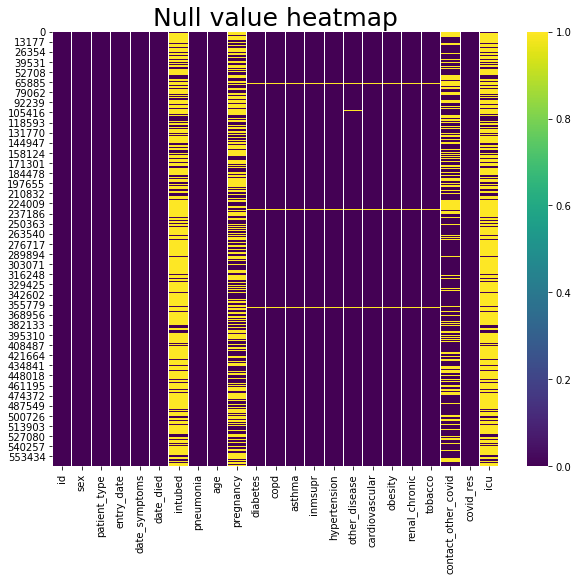

In [75]:
#Chkecking of Null Values

plt.figure(figsize=(10,8))
sns.heatmap(df.isnull(),cmap='viridis')
plt.title('Null value heatmap',size=25)

In [76]:
df.isnull().sum()

id                          0
sex                         0
patient_type                0
entry_date                  0
date_symptoms               0
date_died                   0
intubed                444813
pneumonia                  11
age                       207
pregnancy              288699
diabetes                 1981
copd                     1749
asthma                   1752
inmsupr                  1980
hypertension             1824
other_disease            2598
cardiovascular           1822
obesity                  1781
renal_chronic            1792
tobacco                  1907
contact_other_covid    175031
covid_res                   0
icu                    444814
dtype: int64

# Null Value Imputation

In [77]:
df['intubed']=df['intubed'].fillna(0)
df['intubed'].isnull().sum()

0

In [78]:
df['pneumonia']=df['pneumonia'].fillna(0)
df['pneumonia'].isnull().sum()

0

In [79]:
df['age']=df['age'].fillna(0)
df['age'].isnull().sum()

0

In [80]:
df['pregnancy']=df['pregnancy'].fillna(0)
df['pregnancy'].isnull().sum()

0

In [81]:
df['diabetes']=df['diabetes'].fillna(0)
df['diabetes'].isnull().sum()

0

In [82]:
df['copd']=df['copd'].fillna(0)
df['copd'].isnull().sum()

0

In [83]:
df['asthma']=df['asthma'].fillna(0)
df['asthma'].isnull().sum()

0

In [84]:
df['inmsupr']=df['inmsupr'].fillna(0)
df['inmsupr'].isnull().sum()

0

In [85]:
df['hypertension']=df['hypertension'].fillna(0)
df['hypertension'].isnull().sum()

0

In [86]:
df['cardiovascular']=df['cardiovascular'].fillna(0)
df['cardiovascular'].isnull().sum()

0

In [87]:
df['obesity']=df['obesity'].fillna(0)
df['obesity'].isnull().sum()

0

In [88]:
df['renal_chronic']=df['renal_chronic'].fillna(0)
df['renal_chronic'].isnull().sum()

0

In [89]:
df['tobacco']=df['tobacco'].fillna(0)
df['tobacco'].isnull().sum()

0

In [90]:
df['contact_other_covid']=df['contact_other_covid'].fillna(0)
df['contact_other_covid'].isnull().sum()

0

In [91]:
df['icu']=df['icu'].fillna(0)
df['icu'].isnull().sum()

0

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566602 entries, 0 to 566601
Data columns (total 23 columns):
id                     566602 non-null object
sex                    566602 non-null object
patient_type           566602 non-null object
entry_date             566602 non-null object
date_symptoms          566602 non-null object
date_died              566602 non-null object
intubed                566602 non-null object
pneumonia              566602 non-null object
age                    566602 non-null object
pregnancy              566602 non-null object
diabetes               566602 non-null object
copd                   566602 non-null object
asthma                 566602 non-null object
inmsupr                566602 non-null object
hypertension           566602 non-null object
other_disease          564004 non-null object
cardiovascular         566602 non-null object
obesity                566602 non-null object
renal_chronic          566602 non-null object
tobacco        

# Column Drop

In [93]:
df=df.drop(['id','entry_date','date_symptoms','date_died'],axis=1)
df.head()

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,Male,Outpatient,0,No,27,0,No,No,No,No,No,No,No,No,No,No,No,Positive,0
1,Male,Outpatient,0,No,24,0,No,No,No,No,No,No,No,No,No,No,0,Positive,0
2,Female,Inpatient,No,No,54,No,No,No,No,No,No,No,No,Yes,No,No,0,Positive,No
3,Male,Inpatient,No,Yes,30,0,No,No,No,No,No,No,No,No,No,No,0,Positive,No
4,Female,Inpatient,No,No,60,No,Yes,No,No,No,Yes,No,Yes,No,No,No,0,Positive,No


In [94]:
df = df.drop(df[df.covid_res=='Results Awaited'].index, axis=0)

# Converting Categorical Columns into Numerical

In [95]:
# Finding Categorical Columns
categorical_feature_mask = df.dtypes==object

# filter categorical columns using mask and turn it into a list
categorical_cols = df.columns[categorical_feature_mask].tolist()
print(categorical_cols)

['sex', 'patient_type', 'intubed', 'pneumonia', 'age', 'pregnancy', 'diabetes', 'copd', 'asthma', 'inmsupr', 'hypertension', 'other_disease', 'cardiovascular', 'obesity', 'renal_chronic', 'tobacco', 'contact_other_covid', 'covid_res', 'icu']


In [96]:
for c in categorical_cols:
    lbl = LabelEncoder() 
    lbl.fit(list(df[c].values)) 
    df[c] = lbl.transform(list(df[c].values))

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499692 entries, 0 to 499691
Data columns (total 19 columns):
sex                    499692 non-null int64
patient_type           499692 non-null int64
intubed                499692 non-null int64
pneumonia              499692 non-null int64
age                    499692 non-null int64
pregnancy              499692 non-null int64
diabetes               499692 non-null int64
copd                   499692 non-null int64
asthma                 499692 non-null int64
inmsupr                499692 non-null int64
hypertension           499692 non-null int64
other_disease          499692 non-null int64
cardiovascular         499692 non-null int64
obesity                499692 non-null int64
renal_chronic          499692 non-null int64
tobacco                499692 non-null int64
contact_other_covid    499692 non-null int64
covid_res              499692 non-null int64
icu                    499692 non-null int64
dtypes: int64(19)
memory usage: 76

# Principal Component Analysis

In [98]:
df.head()

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,1,1,0,1,39,0,1,1,1,1,1,0,1,1,1,1,1,1,0
1,1,1,0,1,36,0,1,1,1,1,1,0,1,1,1,1,0,1,0
2,0,0,1,1,69,1,1,1,1,1,1,0,1,2,1,1,0,1,1
3,1,0,1,2,43,0,1,1,1,1,1,0,1,1,1,1,0,1,1
4,0,0,1,1,76,1,2,1,1,1,2,0,2,1,1,1,0,1,1


In [99]:
features = ['sex','patient_type','intubed','pneumonia','age','pregnancy','diabetes','copd','asthma','inmsupr','hypertension','other_disease','cardiovascular','obesity','renal_chronic','tobacco','contact_other_covid','icu']
# Separating out the features
x = df.loc[:, features].values

# Separating out the target
y = df.loc[:,['covid_res']].values

# Standardizing the features
x = MinMaxScaler().fit_transform(x)

print(x)

[[1.  1.  0.  ... 0.5 0.5 0. ]
 [1.  1.  0.  ... 0.5 0.  0. ]
 [0.  0.  0.5 ... 0.5 0.  0.5]
 ...
 [0.  1.  0.  ... 0.5 0.5 0. ]
 [0.  1.  0.  ... 0.5 1.  0. ]
 [0.  1.  0.  ... 0.5 0.  0. ]]


In [100]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
principalComponents = pca.fit_transform(x)

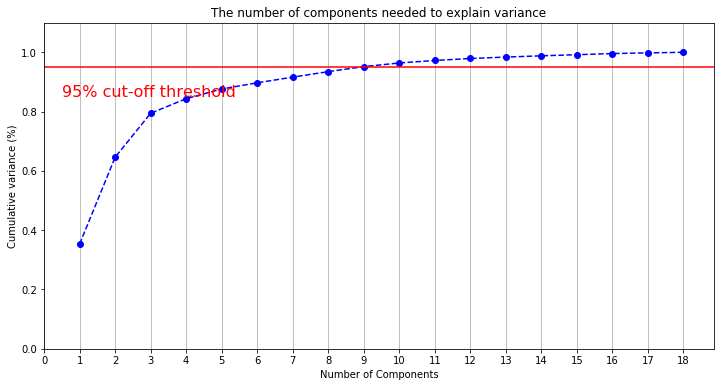

In [101]:
pca = PCA().fit(x)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 19, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 19, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [102]:
principalDf = pd.DataFrame(data = principalComponents, columns = [' PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9'])

In [103]:
principalDf.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,0.161532,-0.585047,-0.188504,0.121490,0.001899,0.001432,0.016056,-0.092107,0.061632
1,0.295229,-0.437108,-0.646309,0.137238,-0.014297,-0.009328,0.019314,-0.104262,0.081243
2,0.394053,1.121266,-0.106075,0.032821,-0.428819,0.099991,-0.045811,-0.107100,-0.298867
3,1.196544,0.328638,-0.121142,0.312743,-0.073108,-0.003181,0.029345,0.008301,0.240026
4,0.462509,1.182721,-0.085158,-0.349097,0.301362,-0.107003,0.021448,-0.311032,-0.174052


In [104]:
finalDf = pd.concat([principalDf, df[['covid_res']]], axis = 1)

In [38]:
# sns.pairplot(finalDf, hue='covid_res')

# Train, Test Data Spliting

In [105]:
x = principalDf
y = df['covid_res']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# Decision Tree

In [39]:
from sklearn import metrics
from sklearn import tree

dtree = tree.DecisionTreeClassifier()
dtree = dtree.fit(x_train, y_train)

dtree_pred = dtree.predict(x_test)

dtree_accuracy = metrics.accuracy_score(y_test, dtree_pred)
print(dtree_accuracy)

dtree_precision=metrics.precision_score(y_test, dtree_pred,pos_label=0)
print(dtree_precision)

dtree_recall=metrics.recall_score(y_test, dtree_pred,pos_label=0)
print(dtree_recall)

dtree_f1_score= metrics.f1_score(y_test, dtree_pred,pos_label=0)
print(dtree_f1_score)

print(confusion_matrix(y_test,dtree_pred))
print(classification_report(y_test,dtree_pred))

0.6184726632334498
0.6198196244284191
0.8193329510703364
0.705746771621135
[[68588 15124]
 [42070 24126]]
              precision    recall  f1-score   support

           0       0.62      0.82      0.71     83712
           1       0.61      0.36      0.46     66196

    accuracy                           0.62    149908
   macro avg       0.62      0.59      0.58    149908
weighted avg       0.62      0.62      0.60    149908



# Decision Tree with Cross Validation

In [40]:
from sklearn.model_selection import cross_val_score

dtree_cross_val_acc = cross_val_score(dtree, x, y, cv=10, scoring='accuracy')

dtree_cv_accuracy = dtree_cross_val_acc.mean()
print(dtree_cv_accuracy)

dtree_cross_val_pre = cross_val_score(dtree, x, y, cv=10, scoring='precision_macro')
dtree_cv_precision = dtree_cross_val_pre.mean()
print(dtree_cv_precision)

dtree_cross_val_re = cross_val_score(dtree, x, y, cv=10, scoring='recall_macro')
dtree_cv_recall = dtree_cross_val_re.mean()
print(dtree_cv_recall)

dtree_cross_val_f1 = cross_val_score(dtree, x, y, cv=10, scoring='f1_macro')
dtree_cv_f1_score = dtree_cross_val_f1.mean()
print(dtree_cv_f1_score)

0.6219511279195619
0.6220525462683876
0.5951766363514192
0.5850024249114734


# Naive Bayes

In [41]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

Nb = GaussianNB()
Nb.fit(x_train,y_train)
Nb_pred= Nb.predict(x_test)
Nb_accuracy = metrics.accuracy_score(y_test, Nb_pred)
print(Nb_accuracy)

Nb_precision=metrics.precision_score(y_test, Nb_pred,pos_label=0)
print(Nb_precision)

Nb_recall=metrics.recall_score(y_test, Nb_pred,pos_label=0)
print(Nb_recall)

Nb_f1_score= metrics.f1_score(y_test, Nb_pred,pos_label=0)
print(Nb_f1_score)

print(confusion_matrix(y_test,Nb_pred))
print(classification_report(y_test,Nb_pred))

0.607492595458548
0.6305589383949943
0.71748375382263
0.6712187926063342
[[60062 23650]
 [35190 31006]]
              precision    recall  f1-score   support

           0       0.63      0.72      0.67     83712
           1       0.57      0.47      0.51     66196

    accuracy                           0.61    149908
   macro avg       0.60      0.59      0.59    149908
weighted avg       0.60      0.61      0.60    149908



# Naive Bayes with cross Validation

In [42]:
from sklearn.model_selection import cross_val_score

Nb_cross_val = cross_val_score(Nb, x, y, cv=10, scoring='accuracy')

Nb_cv_accuracy = Nb_cross_val.mean()
print(Nb_cv_accuracy)

Nb_cross_val_pre = cross_val_score(Nb, x, y, cv=10, scoring='precision_macro')
Nb_cv_precision = Nb_cross_val_pre.mean()
print(Nb_cv_precision)

Nb_cross_val_re = cross_val_score(Nb, x, y, cv=10, scoring='recall_macro')
Nb_cv_recall = Nb_cross_val_re.mean()
print(Nb_cv_recall)

Nb_cross_val_f1 = cross_val_score(Nb, x, y, cv=10, scoring='f1_macro')
Nb_cv_f1_score = Nb_cross_val_f1.mean()
print(Nb_cv_f1_score)

0.6109723501718131
0.6027542773395304
0.5965889125619239
0.5959537857153439


# Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier
rnd_for = RandomForestClassifier()
rnd_for.fit(x_train, y_train)
rnd_for_pred = rnd_for.predict(x_test)
rnd_for_accuracy = metrics.accuracy_score(y_test, rnd_for_pred)
print(rnd_for_accuracy)

rnd_for_precision=metrics.precision_score(y_test, rnd_for_pred,pos_label=0)
print(rnd_for_precision)

rnd_for_recall=metrics.recall_score(y_test, rnd_for_pred,pos_label=0)
print(rnd_for_recall)

rnd_for_f1_score= metrics.f1_score(y_test, rnd_for_pred,pos_label=0)
print(rnd_for_f1_score)

print(confusion_matrix(y_test,rnd_for_pred))
print(classification_report(y_test,rnd_for_pred))

0.6196600581690104
0.6225171641517054
0.8101825305810397
0.7040589639779924
[[67822 15890]
 [41126 25070]]
              precision    recall  f1-score   support

           0       0.62      0.81      0.70     83712
           1       0.61      0.38      0.47     66196

    accuracy                           0.62    149908
   macro avg       0.62      0.59      0.59    149908
weighted avg       0.62      0.62      0.60    149908



# Random Forest with Cross Validation

In [ ]:
rnd_for_cross_val = cross_val_score(rnd_for, x, y, cv=10, scoring='accuracy')
rnd_for_cv_accuracy = rnd_for_cross_val.mean()
print(rnd_for_cv_accuracy)

rnd_for_cross_val_pre = cross_val_score(rnd_for, x, y, cv=10, scoring='precision_macro')
rnd_for_cv_precision = rnd_for_cross_val_pre.mean()
print(rnd_for_cv_precision)

rnd_for_cross_val_re = cross_val_score(rnd_for, x, y, cv=10, scoring='recall_macro')
rnd_for_cv_recall = rnd_for_cross_val_re.mean()
print(rnd_for_cv_recall)

rnd_for_cross_val_f1 = cross_val_score(rnd_for, x, y, cv=10, scoring='f1_macro')
rnd_for_cv_f1_score = rnd_for_cross_val_f1.mean()
print(rnd_for_cv_f1_score)

0.6234540451596824
0.6216711352527141


# Logistic Regression

In [108]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train, y_train)
log_pred = log.predict(x_test)
log_accuracy = metrics.accuracy_score(y_test, log_pred)
print(log_accuracy)

log_precision=metrics.precision_score(y_test, log_pred,pos_label=0)
print(log_precision)

log_recall=metrics.recall_score(y_test, log_pred,pos_label=0)
print(log_recall)

log_f1_score= metrics.f1_score(y_test, log_pred,pos_label=0)
print(log_f1_score)

print(confusion_matrix(y_test,log_pred))
print(classification_report(y_test,log_pred))

0.6256637404274622
0.6216540292717334
0.8422687308868502
0.7153379461477589
[[70508 13204]
 [42912 23284]]
              precision    recall  f1-score   support

           0       0.62      0.84      0.72     83712
           1       0.64      0.35      0.45     66196

    accuracy                           0.63    149908
   macro avg       0.63      0.60      0.58    149908
weighted avg       0.63      0.63      0.60    149908



# Logistic Regression with Cross validation

In [ ]:
log_cross_val = cross_val_score(log, x, y, cv=10, scoring='accuracy')
log_cv_accuracy = log_cross_val.mean()
print(log_cv_accuracy)

log_cross_val_pre = cross_val_score(log, x, y, cv=10, scoring='precision_macro')
log_cv_precision = log_cross_val_pre.mean()
print(log_cv_precision)

log_cross_val_re = cross_val_score(log, x, y, cv=10, scoring='recall_macro')
log_cv_recall = log_cross_val_re.mean()
print(log_cv_recall)

log_cross_val_f1 = cross_val_score(log, x, y, cv=10, scoring='f1_macro')
log_cv_f1_score = log_cross_val_f1.mean()
print(log_cv_f1_score)

# Adaboost

In [110]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics


Ada_model=AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=500,learning_rate=0.1)
Ada_model.fit(x_train,y_train)
ada_pred=Ada_model.predict(x_test)
ada_accuracy = metrics.accuracy_score(y_test, ada_pred)
print(ada_accuracy)

ada_precision=metrics.precision_score(y_test, ada_pred,pos_label=0)
print(ada_precision)

ada_recall=metrics.recall_score(y_test, ada_pred,pos_label=0)
print(ada_recall)

ada_f1_score= metrics.f1_score(y_test, ada_pred,pos_label=0)
print(ada_f1_score)

print(confusion_matrix(y_test,ada_pred))
print(classification_report(y_test,ada_pred))

0.6296261707180404
0.6272916102230651
0.8297496177370031
0.7144546960018926
[[69460 14252]
 [41270 24926]]
              precision    recall  f1-score   support

           0       0.63      0.83      0.71     83712
           1       0.64      0.38      0.47     66196

    accuracy                           0.63    149908
   macro avg       0.63      0.60      0.59    149908
weighted avg       0.63      0.63      0.61    149908



# Adaboost with cross Validation

In [ ]:
ada_cross_val = cross_val_score(Ada_model, x, y, cv=10, scoring='accuracy')
ada_cv_accuracy = log_cross_val.mean()
print(ada_cv_accuracy)

ada_cross_val_pre = cross_val_score(Ada_model, x, y, cv=10, scoring='precision_macro')
ada_cv_precision = ada_cross_val_pre.mean()
print(ada_cv_precision)

ada_cross_val_re = cross_val_score(Ada_model, x, y, cv=10, scoring='recall_macro')
ada_cv_recall = ada_cross_val_re.mean()
print(ada_cv_recall)

ada_cross_val_f1 = cross_val_score(Ada_model, x, y, cv=10, scoring='f1_macro')
ada_cv_f1_score = ada_cross_val_f1.mean()
print(ada_cv_f1_score)


# KNN

In [109]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=35)
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
print(knn_accuracy)

knn_precision=metrics.precision_score(y_test, knn_pred,pos_label=0)
print(knn_precision)

knn_recall=metrics.recall_score(y_test, knn_pred,pos_label=0)
print(knn_recall)

knn_f1_score= metrics.f1_score(y_test, knn_pred,pos_label=0)
print(knn_f1_score)

print(confusion_matrix(y_test,knn_pred))
print(classification_report(y_test,knn_pred))

0.6227019238466259
0.6317853537314592
0.7774751529051988
0.6970995244419691
[[65084 18628]
 [37932 28264]]
              precision    recall  f1-score   support

           0       0.63      0.78      0.70     83712
           1       0.60      0.43      0.50     66196

    accuracy                           0.62    149908
   macro avg       0.62      0.60      0.60    149908
weighted avg       0.62      0.62      0.61    149908



# KNN with Cross Validation

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

knn_cross_val = cross_val_score(knn, x, y, cv=10, scoring='accuracy')
knn_cv_accuracy = knn_cross_val.mean()
print(knn_cv_accuracy)

knn_cross_val_pre = cross_val_score(knn, x, y, cv=10, scoring='precision_macro')
knn_cv_precision = knn_cross_val_pre.mean()
print(knn_cv_precision)

knn_cross_val_re = cross_val_score(knn, x, y, cv=10, scoring='recall_macro')
knn_cv_recall = knn_cross_val_re.mean()
print(knn_cv_recall)

knn_cross_val_f1 = cross_val_score(knn, x, y, cv=10, scoring='f1_macro')
knn_cv_f1_score = knn_cross_val_f1.mean()
print(knn_cv_f1_score)

# Gradient Boosting Classifier

In [106]:
from sklearn.ensemble import GradientBoostingClassifier

Grad_boost = GradientBoostingClassifier()
Grad_boost.fit(x_train, y_train)
Grad_boost_pred = Grad_boost.predict(x_test)
Grad_boost_accuracy = metrics.accuracy_score(y_test, Grad_boost_pred)
print(Grad_boost_accuracy)

Grad_boost_precision=metrics.precision_score(y_test, Grad_boost_pred,pos_label=0)
print(Grad_boost_precision)

Grad_boost_recall=metrics.recall_score(y_test, Grad_boost_pred,pos_label=0)
print(Grad_boost_recall)

Grad_boost_f1_score= metrics.f1_score(y_test, Grad_boost_pred,pos_label=0)
print(Grad_boost_f1_score)

print(confusion_matrix(y_test,Grad_boost_pred))
print(classification_report(y_test,Grad_boost_pred))

0.6329815620247085
0.6298525565019053
0.8312786697247706
0.7166816859342413
[[69588 14124]
 [40895 25301]]
              precision    recall  f1-score   support

           0       0.63      0.83      0.72     83712
           1       0.64      0.38      0.48     66196

    accuracy                           0.63    149908
   macro avg       0.64      0.61      0.60    149908
weighted avg       0.64      0.63      0.61    149908



# Gradient Boosting Classifier with Cross Validation

In [ ]:
Grad_boost_cross_val = cross_val_score(Grad_boost, x, y, cv=10, scoring='accuracy')
Grad_boost_cv_accuracy = Grad_boost_cross_val.mean()
print(Grad_boost_cv_accuracy)

Grad_boost_cross_val_pre = cross_val_score(Grad_boost, x, y, cv=10, scoring='precision_macro')
Grad_boost_cv_precision = Grad_boost_cross_val_pre.mean()
print(Grad_boost_cv_precision)

Grad_boost_cross_val_re = cross_val_score(Grad_boost, x, y, cv=10, scoring='recall_macro')
Grad_boost_cv_recall = Grad_boost_cross_val_re.mean()
print(Grad_boost_cv_recall)

Grad_boost_cross_val_f1 = cross_val_score(Grad_boost, x, y, cv=10, scoring='f1_macro')
Grad_boost_cv_f1_score = Grad_boost_cross_val_f1.mean()
print(Grad_boost_cv_f1_score)

# Multilayer Perceptron

In [107]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(max_iter=200,activation='logistic')
MLP.fit(x_train, y_train)
MLP_pred = MLP.predict(x_test)
MLP_accuracy = metrics.accuracy_score(y_test, MLP_pred)
print(MLP_accuracy)

MLP_precision=metrics.precision_score(y_test, MLP_pred,pos_label=0)
print(MLP_precision)

MLP_recall=metrics.recall_score(y_test, MLP_pred,pos_label=0)
print(MLP_recall)

MLP_f1_score= metrics.f1_score(y_test, MLP_pred,pos_label=0)
print(MLP_f1_score)

print(confusion_matrix(y_test,MLP_pred))
print(classification_report(y_test,MLP_pred))

0.6351162046054913
0.631253223310985
0.8334288990825688
0.7183875202718355
[[69768 13944]
 [40755 25441]]
              precision    recall  f1-score   support

           0       0.63      0.83      0.72     83712
           1       0.65      0.38      0.48     66196

    accuracy                           0.64    149908
   macro avg       0.64      0.61      0.60    149908
weighted avg       0.64      0.64      0.61    149908



# Multilayer Perceptron with Cross Validation

In [ ]:
MLP_cross_val = cross_val_score(MLP, x, y, cv=10, scoring='accuracy')
MLP_cv_accuracy = MLP_cross_val.mean()
print(MLP_cv_accuracy)

MLP_cross_val_pre = cross_val_score(MLP, x, y, cv=10, scoring='precision_macro')
MLP_cv_precision = MLP_cross_val_pre.mean()
print(MLP_cv_precision)

MLP_cross_val_re = cross_val_score(MLP, x, y, cv=10, scoring='recall_macro')
MLP_cv_recall = MLP_cross_val_re.mean()
print(MLP_cv_recall)

MLP_cross_val_f1 = cross_val_score(MLP, x, y, cv=10, scoring='f1_macro')
MLP_cv_f1_score = MLP_cross_val_f1.mean()
print(MLP_cv_f1_score)